In [1]:
from keras.models import Sequential, load_model
from keras.layers import *
from keras import optimizers
from keras.models import load_model
from keras import utils
from keras.callbacks import TensorBoard, ModelCheckpoint

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

import tensorflow as tf

# Importing matplotlib to plot images.
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Importing SK-learn to calculate precision and recall
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneGroupOut
from sklearn.utils import shuffle 

# Used for graph export
from tensorflow.python.framework import graph_util
from tensorflow.python.framework import graph_io
from keras import backend as K

import pickle as pkl
import h5py

from pathlib import Path
import os.path
import sys
import datetime
import time



Using TensorFlow backend.


In [2]:
df1 = pd.read_csv('acc.csv')
df2 = pd.read_csv('valacc.csv')

In [12]:
df1.head()

,Step,Value
0,0,0.811335
1,1,0.896038
2,2,0.907840
3,3,0.914254
4,4,0.916948


In [11]:
df2 =df2.drop(['Wall time'], axis=1)


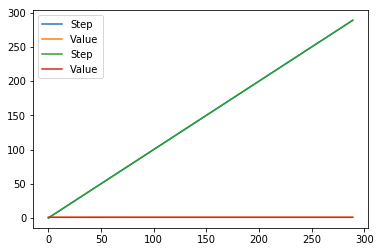

In [13]:


ax = df1.plot()
df2.plot(ax=ax)

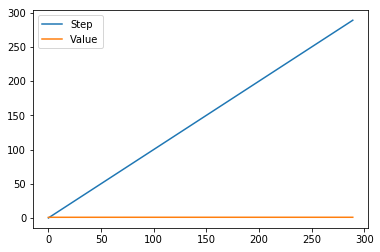

In [14]:
df1.plot()

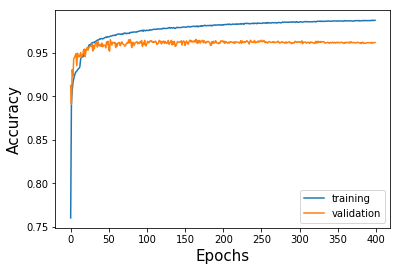

In [5]:
plt.plot(df1.Step, df1.Value, label='training')
plt.plot(df2.Step, df2.Value, label='validation')
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.legend()
plt.savefig('pres.jpg')

In [7]:
df = pd.read_csv('accel_a.csv', delimiter=';')

In [11]:
df

,time,X,Y,Z,mode,pos,GActivity,GConfidence
0,1546937697172,-0.067973,-0.248692,0.233859,TRAIN,HAND,-1,-1
1,1546937697181,-0.217986,0.755003,-0.866077,TRAIN,HAND,-1,-1
2,1546937697194,-0.001924,1.747071,-1.920198,TRAIN,HAND,-1,-1
3,1546937697206,0.353639,2.614797,-2.010604,TRAIN,HAND,-1,-1
4,1546937697219,0.659866,2.648734,-1.438600,TRAIN,HAND,-1,-1
5,1546937697231,0.798378,2.334175,-1.243749,TRAIN,HAND,-1,-1
6,1546937697243,0.788149,1.873334,-1.722388,TRAIN,HAND,-1,-1
7,1546937697256,0.669356,1.622746,-2.754152,TRAIN,HAND,-1,-1
8,1546937697267,0.641976,1.702765,-3.135153,TRAIN,HAND,-1,-1
9,1546937697280,0.847096,1.709575,-2.532460,TRAIN,HAND,-1,-1
